In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import textstat
import seaborn as sns


subreddit = 'conspiracy'
filename = f'./data/{subreddit}_submissions.csv'


In [28]:
dataframe = pd.read_csv(filename, compression='gzip')
authors = dataframe.groupby('author', as_index=False).size()
authors_without_bot = authors.drop(authors.index[(authors['author'] == '[deleted]')], axis=0, inplace=False)
authors_without_bot = authors_without_bot.drop(authors_without_bot.index[(authors_without_bot['author'] == 'AutoModerator')], axis=0, inplace=False)

In [29]:
metadata = pd.DataFrame(columns=['value'])
metadata.loc['total num of submissions'] = pd.Series({'value':len(dataframe)})
metadata.loc['deleted submissions'] = pd.Series({'value':authors.loc[authors['author'] == '[deleted]', 'size'].iloc[0]})
metadata.loc['total num of authors'] = pd.Series({'value':len(authors_without_bot)})
metadata.loc['avg num of submissions'] = pd.Series({'value':'{:.2f}'.format(authors_without_bot['size'].mean())})
metadata.loc['median num of submissions'] = pd.Series({'value':authors_without_bot['size'].median()})

metadata.loc['flesch reading ease score'] = pd.Series({'value':
        '{:.2f}'.format(sum(textstat.flesch_reading_ease(str(submission)) for submission in dataframe['title']) / len(dataframe))})
metadata.loc['average word count'] = pd.Series({'value':
        '{:.2f}'.format(sum(textstat.lexicon_count(str(submission)) for submission in dataframe['title']) / len(dataframe))})
metadata.loc['average num of comments per sub'] = pd.Series({'value':'{:.2f}'.format(dataframe['num_comments'].mean())})
metadata

,value
total num of submissions,7077
deleted submissions,27
total num of authors,3688
avg num of submissions,1.91
median num of submissions,1.0
flesch reading ease score,69.63
average word count,13.57
average num of comments per sub,0.94


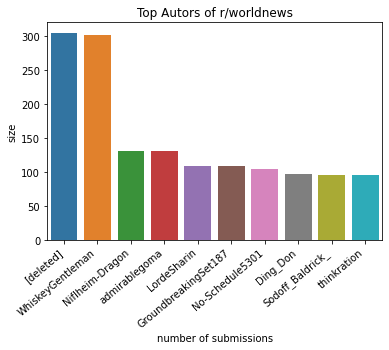

In [17]:
top_authors = authors.nlargest(10, 'size')
ax = sns.barplot(x='author', y='size', data=top_authors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set(xlabel='number of submissions', title=f'Top Autors of r/{subreddit}')
ax.figure.savefig(f'./images/{subreddit}_authors', bbox_inches='tight')


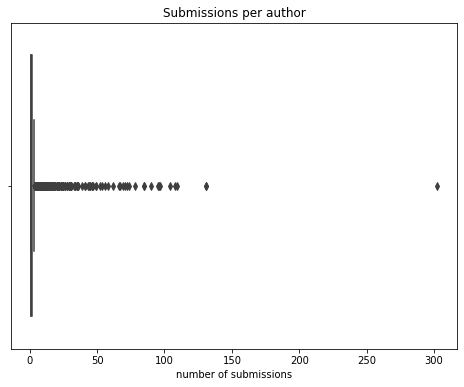

In [18]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x=authors_without_bot['size'])
ax.set(xlabel='number of submissions', title='Submissions per author')
plt.show()

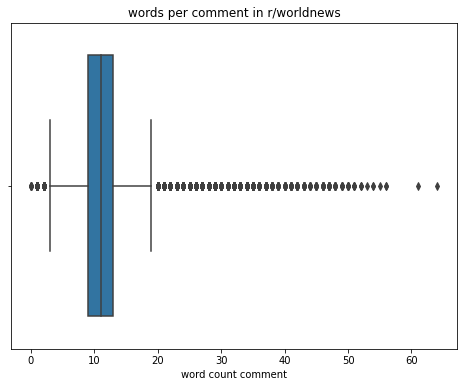

In [19]:
plt.figure(figsize=(8,6))
comment_lengths = [textstat.lexicon_count(str(comment)) for comment in dataframe['title']]
ax = sns.boxplot(x=comment_lengths)
ax.set(xlabel='word count comment', title=f'words per comment in r/{subreddit}')
plt.show()